In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [9]:
# Učitavanje podataka o aerodromima
airports_url = 'https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat'
airports = pd.read_csv(airports_url, header=None, names=['Airport ID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST', 'Tz database time zone', 'Type', 'Source'])


In [10]:
# Konverzija tipa podataka

airports.dropna()
airports.drop_duplicates()
airports['Latitude'] = airports['Latitude'].astype(float)
airports['Longitude'] = airports['Longitude'].astype(float)


In [11]:
airports

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7693,14106,Rogachyovo Air Base,Belaya,Russia,\N,ULDA,71.616699,52.478298,272,\N,\N,\N,airport,OurAirports
7694,14107,Ulan-Ude East Airport,Ulan Ude,Russia,\N,XIUW,51.849998,107.737999,1670,\N,\N,\N,airport,OurAirports
7695,14108,Krechevitsy Air Base,Novgorod,Russia,\N,ULLK,58.625000,31.385000,85,\N,\N,\N,airport,OurAirports
7696,14109,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,\N,\N,\N,airport,OurAirports


In [4]:
# Kreiranje matrice rastojanja
distance_matrix = pairwise_distances(
airports[['Latitude', 'Longitude']].values, metric='euclidean')

In [5]:
distance_matrix

array([[  0.        ,   0.96049679,   1.12524431, ..., 131.0898597 ,
        217.20625595, 122.16418415],
       [  0.96049679,   0.        ,   1.61650182, ..., 131.00690792,
        217.68823831, 122.14654549],
       [  1.12524431,   1.61650182,   0.        , ..., 130.01126209,
        216.14064138, 121.06628361],
       ...,
       [131.0898597 , 131.00690792, 130.01126209, ...,   0.        ,
        133.46895774,  12.38189807],
       [217.20625595, 217.68823831, 216.14064138, ..., 133.46895774,
          0.        , 129.42478387],
       [122.16418415, 122.14654549, 121.06628361, ...,  12.38189807,
        129.42478387,   0.        ]])

In [7]:
# Klasterovanje
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels = agg_clustering.fit_predict(distance_matrix)

/home/anja/.local/lib/python3.8/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


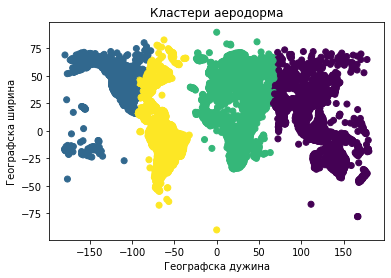

In [8]:
# Vizualizacija klasterovanja
import matplotlib.pyplot as plt

plt.scatter(x=airports['Longitude'], y=airports['Latitude'], c=labels, cmap='viridis')
plt.xlabel('Географска дужина')
plt.ylabel('Географска ширина')
plt.title('Кластери аеродорма')
plt.show()


/home/anja/.local/lib/python3.8/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


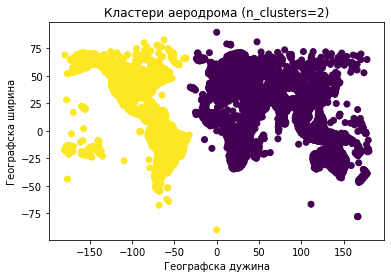

/home/anja/.local/lib/python3.8/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


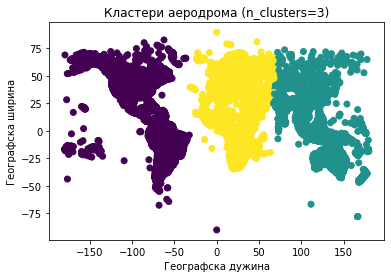

/home/anja/.local/lib/python3.8/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


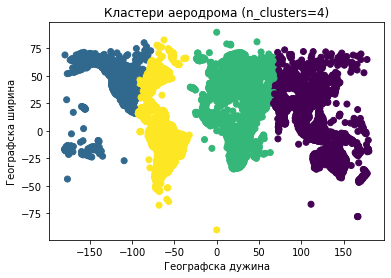

/home/anja/.local/lib/python3.8/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


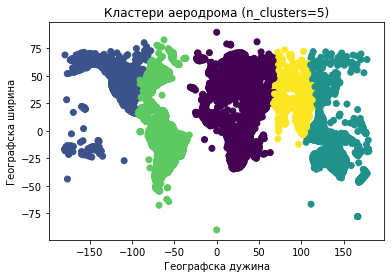

/home/anja/.local/lib/python3.8/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


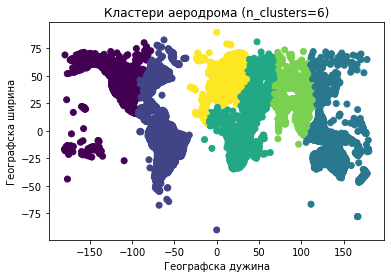

/home/anja/.local/lib/python3.8/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


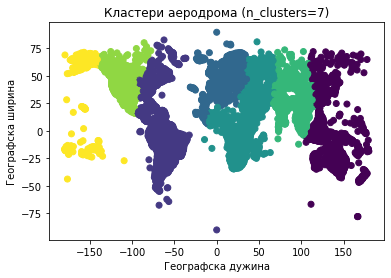

/home/anja/.local/lib/python3.8/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


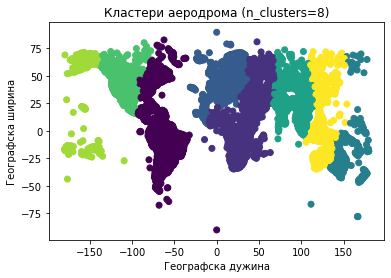

/home/anja/.local/lib/python3.8/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


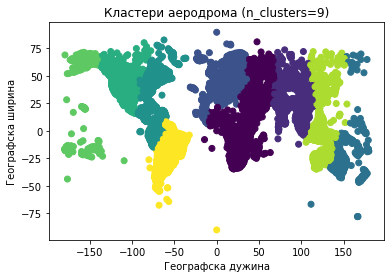

/home/anja/.local/lib/python3.8/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


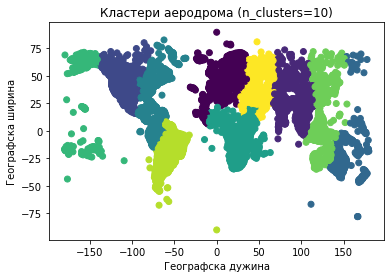

In [19]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# definisanje funkcije za iscrtavanje scatter plotova
def plot_clusters(n_clusters, distance_matrix):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = agg_clustering.fit_predict(distance_matrix)
    plt.scatter(x=airports['Longitude'], y=airports['Latitude'], c=labels, cmap='viridis')
    plt.xlabel('Географска дужина')
    plt.ylabel('Географска ширина')
    plt.title('Кластери аеродрома (n_clusters={})'.format(n_clusters))
    plt.show()

# prikazivanje scatter plotova za različite brojeve klastera
for n_clusters in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
    plot_clusters(n_clusters, distance_matrix)


In [9]:
# Dobijanje informacija o klasterima
clusters = {}
for i, label in enumerate(labels):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(airports.iloc[i]['Name'])

for label, airports in clusters.items():
    print(f'Cluster {label}: {airports}')

Cluster 0: ['Goroka Airport', 'Madang Airport', 'Mount Hagen Kagamuga Airport', 'Nadzab Airport', 'Port Moresby Jacksons International Airport', 'Wewak International Airport', 'Diego Garcia Naval Support Facility', 'Nadi International Airport', 'Nausori International Airport', 'Bonriki International Airport', 'Tabiteuea North Airport', 'Bauerfield International Airport', 'Koné Airport', 'Koumac Airport', 'Lifou Airport', 'Nouméa Magenta Airport', 'Maré Airport', 'Touho Airport', 'Ouvéa Airport', 'La Tontouta International Airport', 'Auckland International Airport', 'Taupo Airport', 'Ardmore Airport', 'Christchurch International Airport', 'Dunedin Airport', 'Gisborne Airport', 'Glentanner Airport', 'Hokitika Airfield', 'Hamilton International Airport', 'Hastings Aerodrome', 'Kerikeri Airport', 'Kaitaia Airport', 'Alexandra Airport', 'Mount Cook Airport', 'Manapouri Airport', 'Hood Airport', 'New Plymouth Airport', 'Nelson Airport', 'Invercargill Airport', 'RNZAF Base Ohakea', 'Oamaru Ai

In [14]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


In [11]:
silhouette_score(distance_matrix, labels)

0.5318450365717025

/home/anja/.local/lib/python3.8/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
/home/anja/.local/lib/python3.8/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
/home/anja/.local/lib/python3.8/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
/home/anja/.local/lib/python3.8/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously lik

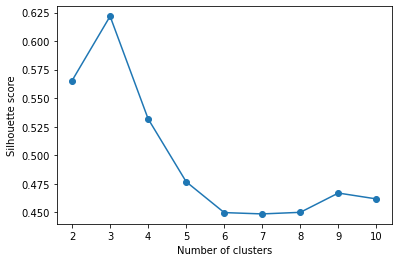

In [12]:
# Proba razlicitih brojeva klastera

n_clusters_range = range(2, 11)
silhouette_scores = []
for n_clusters in n_clusters_range:
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = agg_clustering.fit_predict(distance_matrix)
    silhouette_scores.append(silhouette_score(distance_matrix, labels))


plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()


/home/anja/.local/lib/python3.8/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
/home/anja/.local/lib/python3.8/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
/home/anja/.local/lib/python3.8/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
/home/anja/.local/lib/python3.8/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously lik

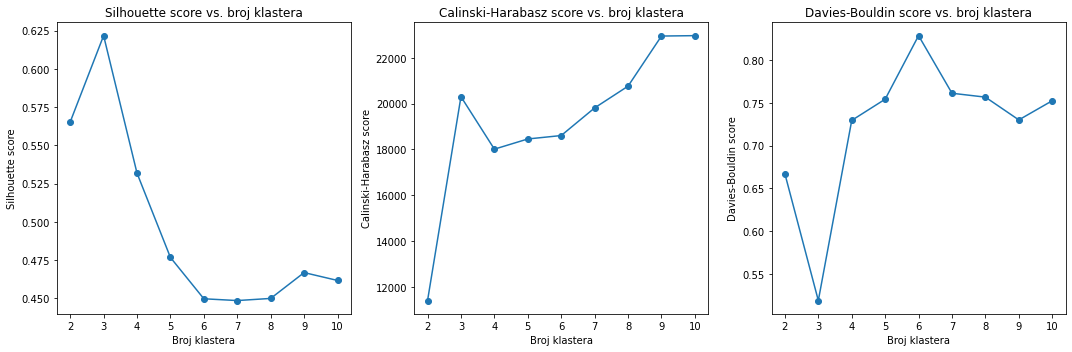

In [6]:
# Proba razlicitih brojeva klastera
n_clusters_range = range(2, 11)
silhouette_scores2 = []
calinski_harabasz_scores = []
davies_bouldin_scores = []
for n_clusters in n_clusters_range:
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = agg_clustering.fit_predict(distance_matrix)
    silhouette_scores2.append(silhouette_score(distance_matrix, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(distance_matrix, labels))
    davies_bouldin_scores.append(davies_bouldin_score(distance_matrix, labels))

# Vizualizacija rezultata
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].plot(n_clusters_range, silhouette_scores2, marker='o')
axs[0].set_xlabel('Broj klastera')
axs[0].set_ylabel('Silhouette score')
axs[0].set_title('Silhouette score vs. broj klastera')

axs[1].plot(n_clusters_range, calinski_harabasz_scores, marker='o')
axs[1].set_xlabel('Broj klastera')
axs[1].set_ylabel('Calinski-Harabasz score')
axs[1].set_title('Calinski-Harabasz score vs. broj klastera')

axs[2].plot(n_clusters_range, davies_bouldin_scores, marker='o')
axs[2].set_xlabel('Broj klastera')
axs[2].set_ylabel('Davies-Bouldin score')
axs[2].set_title('Davies-Bouldin score vs. broj klastera')

plt.tight_layout()
plt.show()

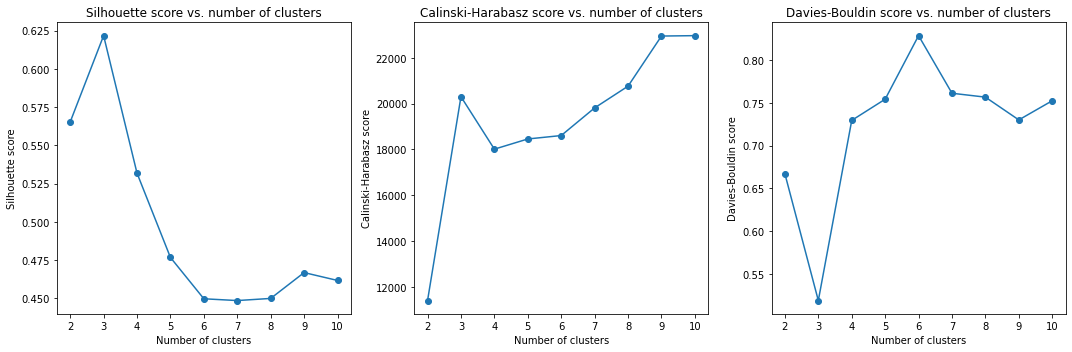

In [18]:
# Vizualizacija rezultata
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].plot(n_clusters_range, silhouette_scores2, marker='o')
axs[0].set_xlabel('Broj klastera')
axs[0].set_ylabel('Silhouette score')
axs[0].set_title('Silhouette score vs. broj klastera')

axs[1].plot(n_clusters_range, calinski_harabasz_scores, marker='o')
axs[1].set_xlabel('Broj klastera')
axs[1].set_ylabel('Calinski-Harabasz score')
axs[1].set_title('Calinski-Harabasz score vs. broj klastera')

axs[2].plot(n_clusters_range, davies_bouldin_scores, marker='o')
axs[2].set_xlabel('Broj klastera')
axs[2].set_ylabel('Davies-Bouldin score')
axs[2].set_title('Davies-Bouldin score vs. broj klastera')

plt.tight_layout()
plt.show()